# Test simulation histograms with theoretical distributions, 2D Levy flight
## The flights in each dimension are independent

DUBKOV, A. A., SPAGNOLO, B., & UCHAIKIN, V. V. (2008). LÉVY FLIGHT SUPERDIFFUSION: AN INTRODUCTION. International Journal of Bifurcation and Chaos, 18(09), 2649–2672. https://doi.org/10.1142/S0218127408021877

( Perhaps this one, too? Léval, M., & Huang, Y. (2015). Stationary densities of stable Lévy flights in external potentials. Imperial College London. https://github.com/melayadi/multivarFoxH )


The flight in each dimension is independently described as:

$ U(x) = \gamma x^{2m}/(2m)   = \gamma x^4/4 $ , 

$m=2$

$ \beta = \sqrt[2m−1]{D/\gamma} $ 



Example values:

$ \gamma = 1. $

$ D = 0.1 $

$  \beta = \sqrt[3]{0.1} $ 

$ \alpha = 1 $

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from run import run


output_dir="./output/"
output_log_file="out.log"

In [2]:
T1=1e5
Ntraj1=1
dt1=0.1
minDt = 0.
D = 0.1
gamma = 0.5

output_data_file=f"outT{T1:.0e}N{Ntraj1:.0e}dt{dt1:.0e}_single_traj.csv"

run(
    output_dir,
    output_data_file,
    output_log_file,
    alpha=1., 
    D=D,
    gamma = gamma,
    dt=dt1, 
    minDt=minDt,
    eta=0.1,
    T=T1, 
    t0=0., 
    x0=0.1,
    y0=0.3
)

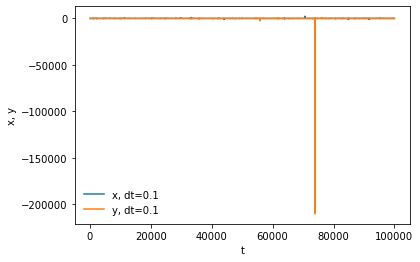

In [3]:
df=pd.read_csv(output_dir+output_data_file)

fig, ax = plt.subplots(1,1)
ax.plot(df.t, df.x , label=f"x, dt={dt1}")
ax.plot(df.t, df.y , label=f"y, dt={dt1}")
ax.legend(loc='best', frameon=False)
ax.set_xlabel("t")
ax.set_ylabel("x, y")
plt.show()

In [4]:
T1=1e2
Ntraj1=1e5
dt1=0.1

D = 0.1
gamma = 0.5

output_data_file1=f"outT{T1:.0e}N{Ntraj1:.0e}dt{dt1:.0e}.csv"

run(
    output_dir,
    output_data_file1,
    output_log_file,
    alpha=1., 
    D=D,
    gamma = gamma,
    dt=dt1, 
    minDt=minDt,
    eta=0.1,
    T=T1, 
    t0=0., 
    x0=0.1,
    y0=0.3,
    Ntraj=Ntraj1
)

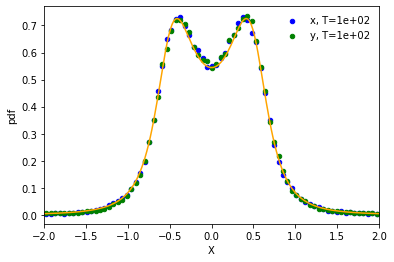

In [5]:
Nbins = 75

x = np.linspace(-2,2,200)
beta = np.power(D/gamma, 1./3.)
# y = beta**3. / (np.pi * (x**4. - (x**2.) * (beta**2.) + beta**4.) ) 
y = np.power(beta,3.) / (np.pi* (np.power(x,4.) - np.power(x,2.) * np.power(beta,2.) + np.power(beta,4.) )) # Źle?



df1=pd.read_csv(output_dir+output_data_file1)

range = (-2,2)

fig, ax = plt.subplots(1,1)

n_x, bins_x  = np.histogram(np.array(df1.x), bins=Nbins, range=range, density=True)
n_y, bins_y  = np.histogram(np.array(df1.y), bins=Nbins, range=range, density=True)
# Alternative: ax.hist with zero transparency
# n,bins,patches=ax.hist(df1.X, bins=Nbins, range=range, density=True, histtype='stepfilled', alpha=0.) 

ax.scatter((bins_x[1:] + bins_x[:-1])/2., n_x, marker='o', color='blue', s=20, alpha=1,\
     label=f'x, T={T1:.0e}')
ax.scatter((bins_y[1:] + bins_y[:-1])/2., n_y, marker='o', color='green', s=20, alpha=1,\
     label=f'y, T={T1:.0e}')
ax.plot(x,y, color='orange')



ax.legend(loc='best', frameon=False)
ax.set_xlabel('X') 
ax.set_ylabel('pdf')
ax.set_xlim(range)
plt.show()